Data folder already created.
Augmented folder already exists at .eycdata/train/pre/augmented
Augmented folder already exists at .eycdata/train/post/augmented


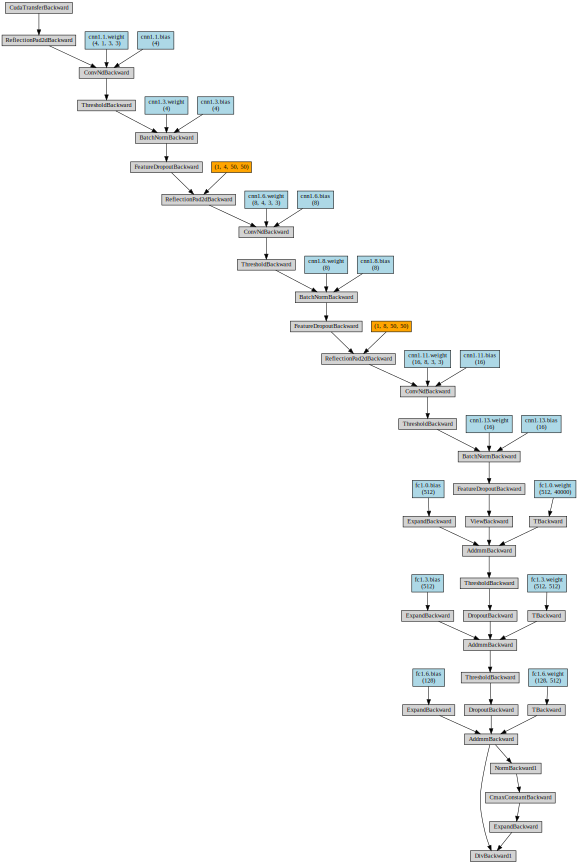

In [6]:
import numpy as np
from eycDataset import EycDataset
import torch
from torch.utils.data import DataLoader,Dataset
from torch import optim
from tripletLoss import TripletLoss
from siamese import SiameseNetwork
from torch.autograd import Variable
import torch.nn.functional as F
from torchviz import make_dot, make_dot_from_trace

dataset = EycDataset(train=True)
net = torch.load('models/model_triplet_8.pt').eval()

dataloader = DataLoader(dataset,
                        shuffle=False,
                        num_workers=8,
                        batch_size=1)

data_iter = iter(dataloader)

count_same = 0
count_diff = 0

# for i in range(400):
    
anchor, positive, negative = next(data_iter)

anchor, positive, negative = Variable(anchor).cuda(), Variable(positive).cuda() , Variable(negative).cuda()
(anchor_output, positive_output, negative_output)  = net(anchor, positive, negative)

make_dot( anchor_output, params=dict(list(net.named_parameters()) + [('x', anchor), ('y', positive), ('z', negative)]))
# print(count_same, " - ", count_diff)
